## Naive Bayes Classifier

    * Relative Probability : Bayes Rule 
    * P(A|B) = P(B|A) * P(A) / P(B)
    
    * Find P(A|B) =>   1)P(Y=0|X) 2) P(Y=1|X)  -- always difficult to find
    
    * P(Y=0|X) = P(X|Y=0) * P(Y=0) / P(X)
    * P(Y=1|X) = P(X|Y=1) * P(Y=1) / P(X)
    
    * P(Y=0) or P(Y=1) -- no of times we predict (0/1) / total no
    * P(X) - Individual Probability 
    
    * P(X|Y=0) & P(X|Y=1) - can find 
        * Assumption X ~ N(Mu,Variance)
        * from Data we can find Mu & Variance Easily
        * from Density curve we can find the Area under curve 
        
     * When Classes are more than two - like In iris - setosa (x1), versicolor (x2), Verginica (x3)
     
     * P(Y|x1,x2,x3) = P(x1,x2,x3 |Y) * P(Y) / P(x1,x2,x3)
         * x1,x2,x3 are independent so P(x1|Y)*P(x2|Y)*P(x3|Y)
     
     * Recommendation - Select most Relevant Features instead of selecting all Multiple Feature 
         * we can check this with Pettel & sepal Parameter
         * Expected is there should be no overlap for features as to classify them correctly

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# import Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


In [3]:
# spliting the data
from sklearn.model_selection import train_test_split

# Metrics for accuracy
from sklearn import metrics

In [4]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading Data & Preprocessing

## Iris Data

In [5]:
iris = sns.load_dataset('iris')

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# box plot to visualize the Most Relevent Feature
#  * Overlapping 

In [ ]:
## Sepal length

In [8]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

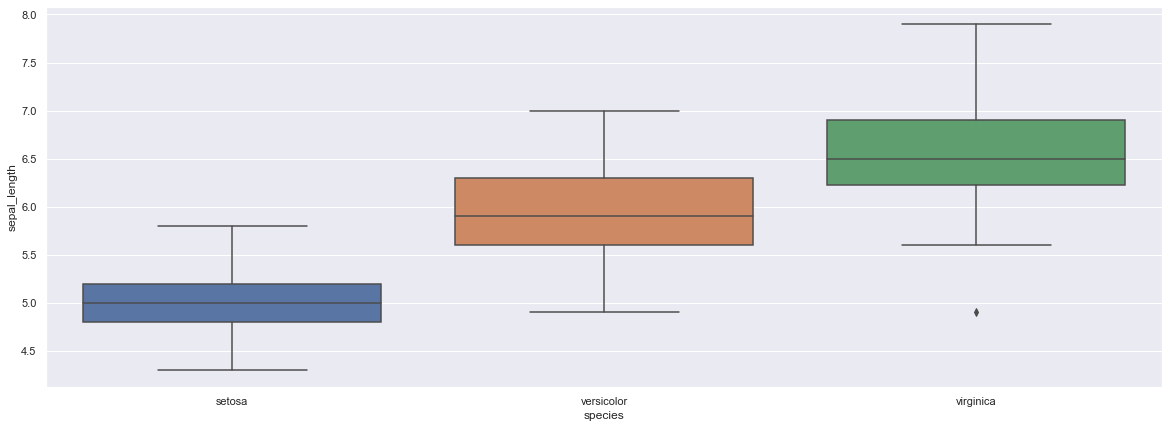

In [7]:
plt.figure(figsize=(20,7))
sns.boxplot(x='species',y='sepal_length',data = iris)

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

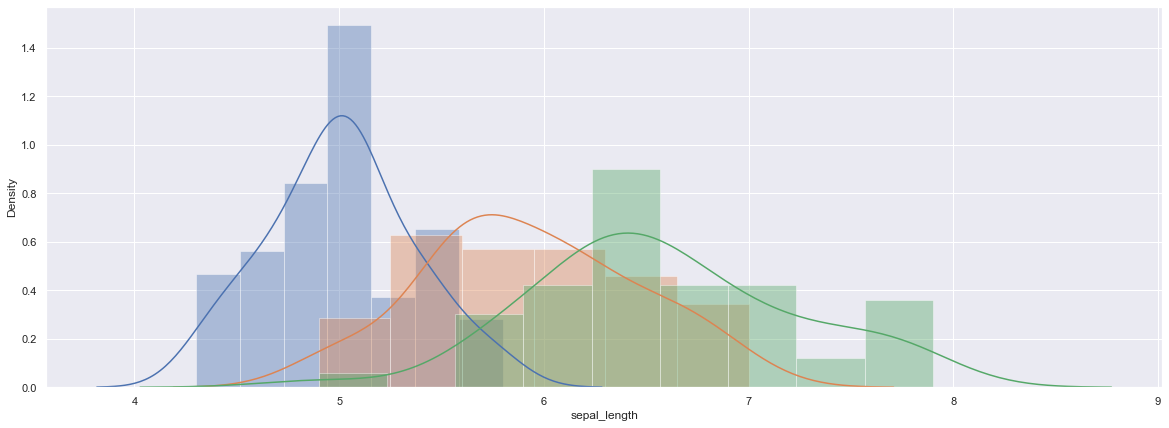

In [9]:
plt.figure(figsize=(20,7))

sns.distplot(iris[iris['species']=='setosa'].iloc[:,0])
sns.distplot(iris[iris['species']=='versicolor'].iloc[:,0])
sns.distplot(iris[iris['species']=='virginica'].iloc[:,0])

In [ ]:
## Sepal Width  

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

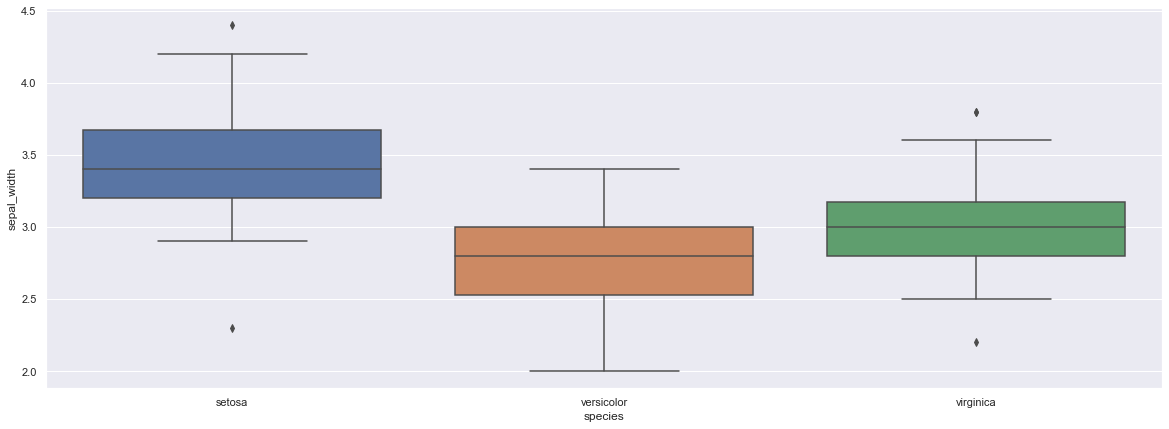

In [10]:
plt.figure(figsize=(20,7))
sns.boxplot(x='species',y='sepal_width',data = iris)

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

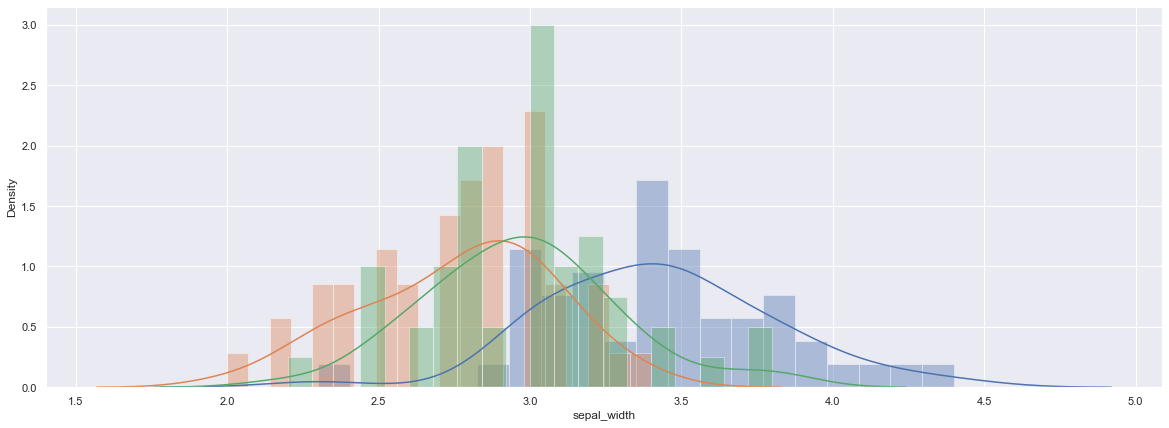

In [11]:
plt.figure(figsize=(20,7))

sns.distplot(iris[iris['species']=='setosa'].iloc[:,1],bins = 20)
sns.distplot(iris[iris['species']=='versicolor'].iloc[:,1],bins = 20)
sns.distplot(iris[iris['species']=='virginica'].iloc[:,1],bins = 20)

In [ ]:
# most of the time data is overlapped

<AxesSubplot:xlabel='species', ylabel='petal_length'>

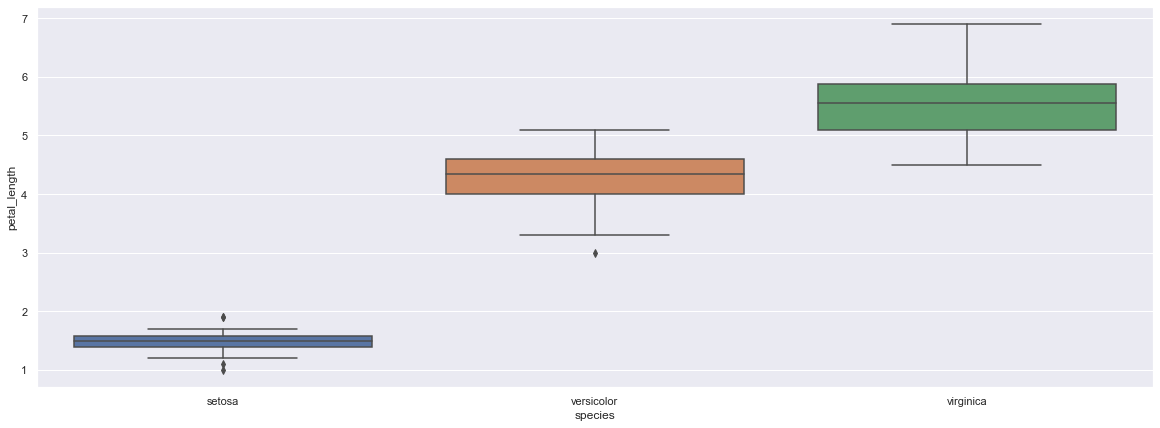

In [12]:
plt.figure(figsize=(20,7))
sns.boxplot(x='species',y='petal_length',data = iris)

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

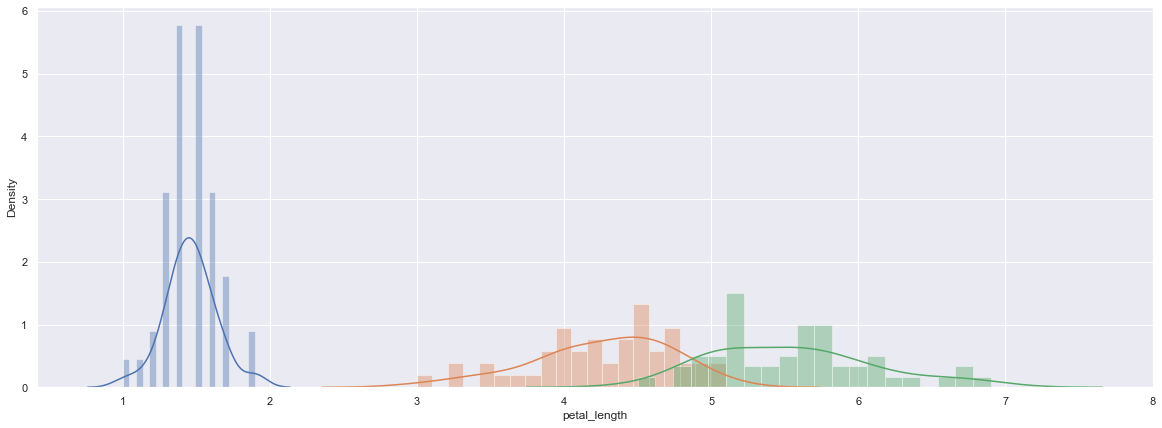

In [13]:
plt.figure(figsize=(20,7))

sns.distplot(iris[iris['species']=='setosa'].iloc[:,2],bins = 20)
sns.distplot(iris[iris['species']=='versicolor'].iloc[:,2],bins = 20)
sns.distplot(iris[iris['species']=='virginica'].iloc[:,2],bins = 20)

In [ ]:
### Petal Width 

<AxesSubplot:xlabel='species', ylabel='petal_width'>

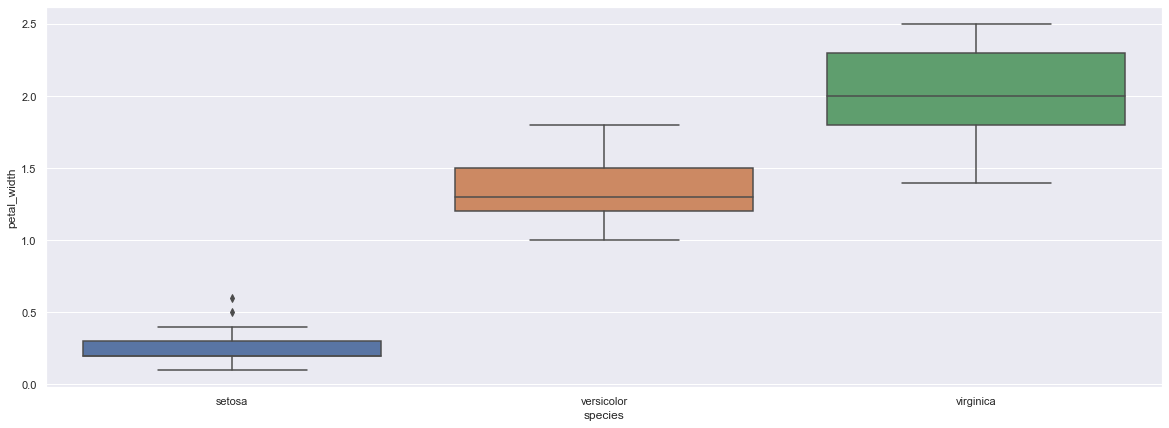

In [14]:
plt.figure(figsize=(20,7))
sns.boxplot(x='species',y='petal_width',data = iris)

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

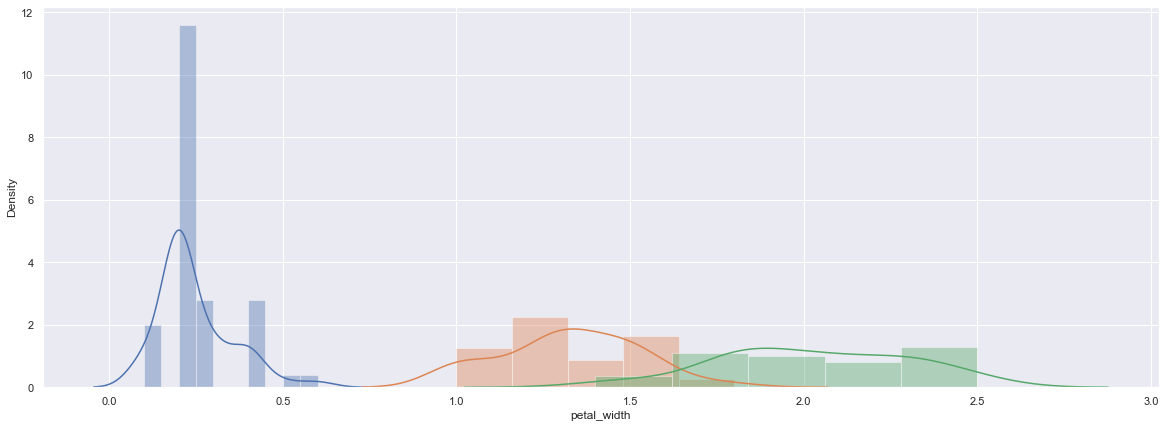

In [15]:
plt.figure(figsize=(20,7))
sns.distplot(iris[iris['species']=='setosa'].iloc[:,3],norm_hist=True)
sns.distplot(iris[iris['species']=='versicolor'].iloc[:,3],norm_hist=True)
sns.distplot(iris[iris['species']=='virginica'].iloc[:,3],norm_hist=True)

### Considering All the Features at A Time

In [16]:
x = iris.iloc[:,0:-1]
y = iris.iloc[:,-1]

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,shuffle=True)

In [18]:
# creating Model
model_g = GaussianNB()

# fitting the Model
model_g.fit(x_train,y_train)

# predicting on Train Data
pred_train_g = model_g.predict(x_train)

# finding Accuracy & Confusion Matrix 

print(f'The Accuracy is = {metrics.accuracy_score(y_train,pred_train_g)*100}%')
print(f'The Confussion Matrix is \n {metrics.confusion_matrix(y_train,pred_train_g)}')

The Accuracy is = 0.9619047619047619%
The Confussion Matrix is 
 [[39  0  0]
 [ 0 35  2]
 [ 0  2 27]]


In [ ]:
#  actual                     setosa   versicolor  virginica
#  predicted    setosa          39         0           0    
#               versicolor      0          35          2
#               virginica       0          2           27


## Calculating Manually by Formula -

In [19]:
x_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width
121,5.6,2.8,4.9,2.0
82,5.8,2.7,3.9,1.2


### Manual Calculation ---- Petal Length

In [20]:
# Calculating only for 1 Feature i.e Petal_length

# mean & Var of Setosa class
mu1 = np.mean(x_train[y_train == 'setosa'].petal_length)
var1 = np.var(x_train[y_train == 'setosa'].petal_length)

# mean & Var of Versicolor class
mu2 = np.mean(x_train[y_train == "versicolor"].petal_length)
var2 = np.var(x_train[y_train == "versicolor"].petal_length)

# mean & Var of Virginica class
mu3 = np.mean(x_train[y_train == "virginica"].petal_length)
var3 = np.var(x_train[y_train == "virginica"].petal_length)

# setosa,versicolor,virginica ~ Normal Dist (mu,var)

In [21]:
def density(mu,x,var):
    return (np.exp(-(x-mu)**2) / (2*var)) /(np.sqrt(var))

# creating 3 columns -> prob_class 1,2,3 in x_test data by applying above fun & values 
# so class 1,2 3 will get assigned to them

x_test['prob_class_1'] = x_test['petal_length'].apply(lambda x:density(mu1,x,var1))
x_test['prob_class_2'] = x_test['petal_length'].apply(lambda x:density(mu2,x,var2))
x_test['prob_class_3'] = x_test['petal_length'].apply(lambda x:density(mu3,x,var3))

# finding the argmax Row wise - predicting highest probability

x_test['pred']=np.argmax(x_test[['prob_class_1','prob_class_2','prob_class_3']].values,axis=1)

# from ablove we will get class -- 0,1,2 ---- 
# values assigned to all the three columns
l = ['setosa','versicolor','virginica']

x_test ['pred'] = x_test['pred'].apply(lambda x: l[x])

x_test['true'] = y_test

In [22]:
np.argmax(x_test[["prob_class_1","prob_class_2","prob_class_3"]].values,axis=1)

array([0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0, 2,
       2], dtype=int64)

In [23]:
x_test

,sepal_length,sepal_width,petal_length,petal_width,prob_class_1,prob_class_2,prob_class_3,pred,true
14,5.8,4.0,1.2,0.2,9.957090e+01,0.000502,2.156313e-08,setosa,setosa
125,7.2,3.2,6.0,1.8,1.068930e-07,0.260977,2.767831e+00,virginica,virginica
138,6.0,3.0,4.8,1.8,1.404097e-03,4.110047,1.955171e+00,versicolor,virginica
114,5.8,2.8,5.1,2.4,1.718085e-04,2.702684,2.793721e+00,virginica,virginica
130,7.4,2.8,6.1,1.9,4.258797e-08,0.182127,2.501848e+00,virginica,virginica
117,7.7,3.8,6.7,2.2,1.119205e-10,0.013823,8.965713e-01,virginica,virginica
57,4.9,2.4,3.3,1.0,3.440048e+00,2.246516,2.205965e-02,setosa,versicolor
34,4.9,3.1,1.5,0.2,1.056467e+02,0.002864,2.671690e-07,setosa,setosa
4,5.0,3.6,1.4,0.2,1.056738e+02,0.001636,1.177915e-07,setosa,setosa
143,6.8,3.2,5.9,2.3,2.629817e-07,0.366560,3.001459e+00,virginica,virginica


In [ ]:
## similary we can cal for multiple features 

## Diabetes Data

In [46]:
diabetes = pd.read_csv('diabetes.csv')

In [25]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

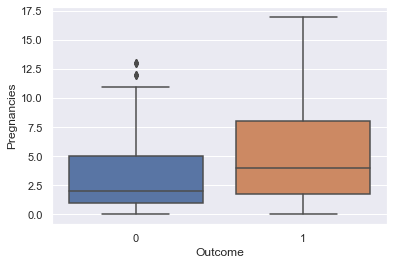

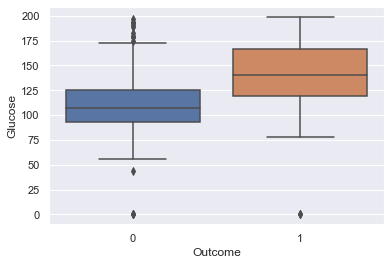

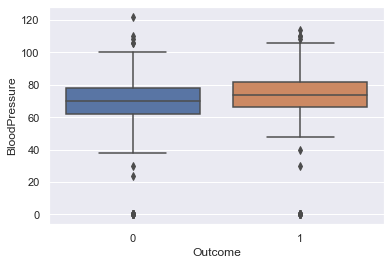

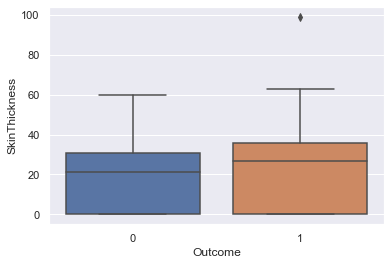

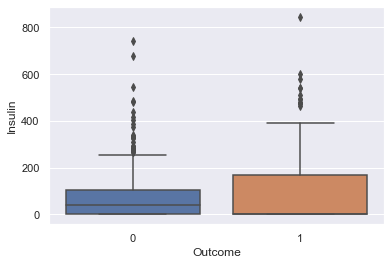

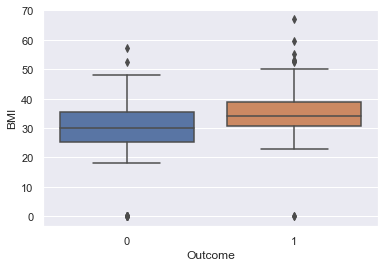

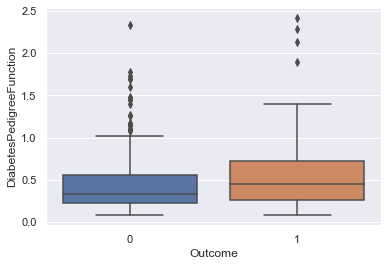

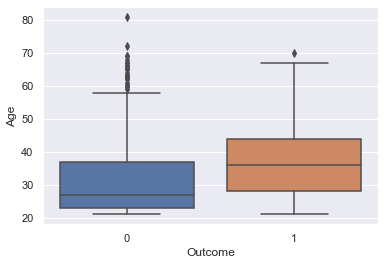

In [27]:
## Finiding the Most Relevent Features - BOX PLOT

for i in diabetes.columns[0:-1]:
    sns.boxplot(diabetes['Outcome'],diabetes[i])
    plt.show()

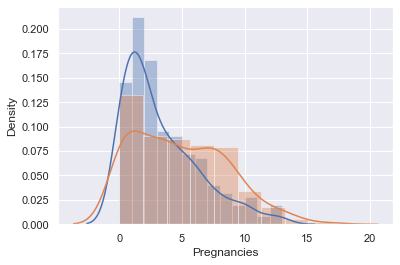

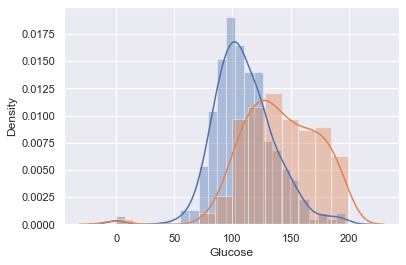

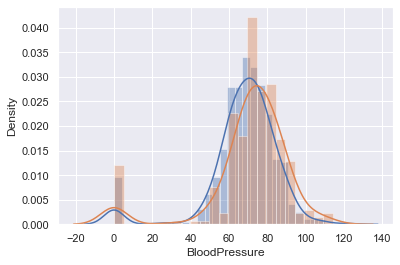

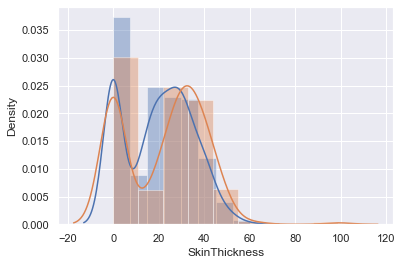

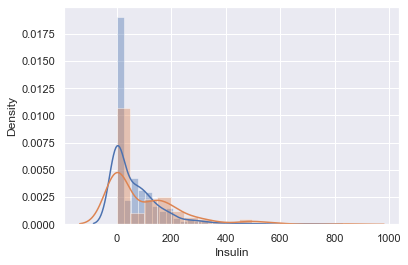

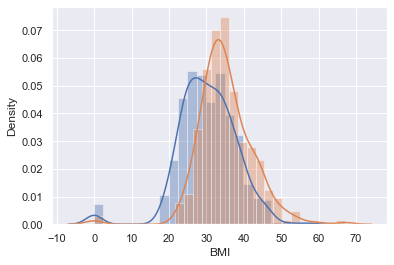

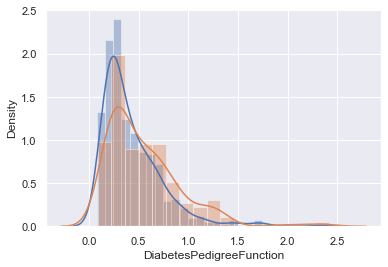

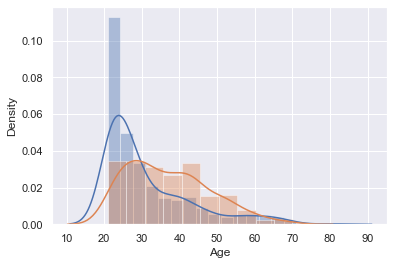

In [29]:
## Finiding the Most Relevent Features - Dist Plot

for i in range(len(diabetes.columns[0:-1])):
    sns.distplot(diabetes[diabetes['Outcome'] == 0].iloc[:,i])
    sns.distplot(diabetes[diabetes['Outcome'] == 1].iloc[:,i])
    plt.show()

In [ ]:
# features are overlapping - so there will be not much difference in accuracy

### Considering all the Features

In [47]:
X = diabetes.iloc[:,0:-1]
Y = diabetes.iloc[:,-1]

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,shuffle=True)

In [34]:
# creating Model
dia_model_g = GaussianNB()

# fitting the Model
dia_model_g.fit(X_train,Y_train)

# predicting on Train Data
pred_train_g = dia_model_g.predict(X_train)

# finding Accuracy & Confusion Matrix 

print(f'The Accuracy is = {metrics.accuracy_score(Y_train,pred_train_g)*100}%')
print(f'The Confussion Matrix is \n {metrics.confusion_matrix(Y_train,pred_train_g)}')

The Accuracy is = 0.7653631284916201%
The Confussion Matrix is 
 [[304  54]
 [ 72 107]]


### One Feature At a Time

In [ ]:
# Taking 1 feature at a time and see the difference in accuracy 

In [ ]:
for i in diabetes.columns[:-1]:
    model = GaussianNB()
    model = model.fit(X_train[[i]],Y_train)
    Y_test_pred = model.predict(X_test[[i]])    
    print("accuracy for feature" ,i,metrics.accuracy_score(Y_test,Y_test_pred))

In [49]:
for i in diabetes.columns[0:-1]:

    # creating Model
    dia_model_g = GaussianNB()

    # fitting the Model
    dia_model_g.fit(X_train[[i]],Y_train)

    # predicting on Train Data
    pred_train_g = dia_model_g.predict(X_train[[i]])

    # finding Accuracy 
    print(f'The Accuracy is of {i} = {metrics.accuracy_score(Y_train,pred_train_g)*100}%')

The Accuracy is of Pregnancies = 0.6945996275605214%
The Accuracy is of Glucose = 0.7560521415270018%
The Accuracy is of BloodPressure = 0.6741154562383612%
The Accuracy is of SkinThickness = 0.664804469273743%
The Accuracy is of Insulin = 0.6610800744878957%
The Accuracy is of BMI = 0.6964618249534451%
The Accuracy is of DiabetesPedigreeFunction = 0.6666666666666666%
The Accuracy is of Age = 0.6629422718808193%


### Two Feature at a Time

In [50]:
import itertools


In [51]:
for i in itertools.combinations(diabetes.columns[0:-1],2):
    # creating Model
    dia_model_g = GaussianNB()

    # fitting the Model
    dia_model_g.fit(X_train[list(i)],Y_train)

    # predicting on Train Data
    pred_train_g = dia_model_g.predict(X_train[list(i)])

    # finding Accuracy 
    print(f'The Accuracy is of {i} = {metrics.accuracy_score(Y_train,pred_train_g)*100}%')


The Accuracy is of ('Pregnancies', 'Glucose') = 0.7486033519553073%
The Accuracy is of ('Pregnancies', 'BloodPressure') = 0.6815642458100558%
The Accuracy is of ('Pregnancies', 'SkinThickness') = 0.6964618249534451%
The Accuracy is of ('Pregnancies', 'Insulin') = 0.6890130353817505%
The Accuracy is of ('Pregnancies', 'BMI') = 0.7169459962756052%
The Accuracy is of ('Pregnancies', 'DiabetesPedigreeFunction') = 0.6964618249534451%
The Accuracy is of ('Pregnancies', 'Age') = 0.6945996275605214%
The Accuracy is of ('Glucose', 'BloodPressure') = 0.750465549348231%
The Accuracy is of ('Glucose', 'SkinThickness') = 0.7560521415270018%
The Accuracy is of ('Glucose', 'Insulin') = 0.7337057728119181%
The Accuracy is of ('Glucose', 'BMI') = 0.7728119180633147%
The Accuracy is of ('Glucose', 'DiabetesPedigreeFunction') = 0.750465549348231%
The Accuracy is of ('Glucose', 'Age') = 0.7430167597765364%
The Accuracy is of ('BloodPressure', 'SkinThickness') = 0.6741154562383612%
The Accuracy is of ('Blo

### Three Functions At A Time

In [53]:
for i in itertools.combinations(diabetes.columns[0:-1],3):
    # creating Model
    dia_model_g = GaussianNB()

    # fitting the Model
    dia_model_g.fit(X_train[list(i)],Y_train)

    # predicting on Train Data
    pred_train_g = dia_model_g.predict(X_train[list(i)])

    # finding Accuracy 
    print(f'The Accuracy is of {i} = {metrics.accuracy_score(Y_train,pred_train_g)*100}%')

The Accuracy is of ('Pregnancies', 'Glucose', 'BloodPressure') = 0.7541899441340782%
The Accuracy is of ('Pregnancies', 'Glucose', 'SkinThickness') = 0.7486033519553073%
The Accuracy is of ('Pregnancies', 'Glucose', 'Insulin') = 0.7430167597765364%
The Accuracy is of ('Pregnancies', 'Glucose', 'BMI') = 0.7616387337057728%
The Accuracy is of ('Pregnancies', 'Glucose', 'DiabetesPedigreeFunction') = 0.7579143389199255%
The Accuracy is of ('Pregnancies', 'Glucose', 'Age') = 0.7411545623836127%
The Accuracy is of ('Pregnancies', 'BloodPressure', 'SkinThickness') = 0.6945996275605214%
The Accuracy is of ('Pregnancies', 'BloodPressure', 'Insulin') = 0.6927374301675978%
The Accuracy is of ('Pregnancies', 'BloodPressure', 'BMI') = 0.707635009310987%
The Accuracy is of ('Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction') = 0.6852886405959032%
The Accuracy is of ('Pregnancies', 'BloodPressure', 'Age') = 0.6834264432029795%
The Accuracy is of ('Pregnancies', 'SkinThickness', 'Insulin') = 0